In [28]:
#!pip install tsfel
from tsfel.feature_extraction import features as tsfelf
import numpy as np
import os
from scipy import signal
import pandas as pd
import glob
import sklearn
from scipy.io import wavfile
from scipy.signal import decimate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [29]:
source_samp_rate=44100
decimation_factor = 4
#actual samples per second. When we record 1 second of audio we get only something like 0.9 seconds because of the chunk size
chunk=4096
single_audio_frame_size=10*chunk

#Preprocessing.
Filtration and feature extraction

In [30]:
def hpf(arr,fs,lf,order):
    wbut = lf
    bbut, abut = signal.butter(order,wbut, btype='highpass', fs=fs)
    return signal.filtfilt(bbut, abut, arr)

def get_features(sig,label,fs = 44100):
    
    s_f = hpf(sig, fs, 65, 2)

    Zero_Cross = tsfelf.zero_cross(sig)
    Zero_Cross_filt = tsfelf.zero_cross(s_f)
            
    Spectral_centroid = tsfelf.spectral_centroid(sig, fs)
    Spectral_centroid_filt = tsfelf.spectral_centroid(s_f, fs)

    Spectral_spread = tsfelf.spectral_spread(sig, fs)
    Spectral_spread_filt = tsfelf.spectral_spread(s_f, fs) 
            
    STD = np.std(sig)
    STD_filt = np.std(s_f)
    
    RMS = tsfelf.rms(sig)
    RMS_filt= tsfelf.rms(s_f)
    
    kurt_filt = tsfelf.kurtosis(s_f)
    
    return [label, RMS, RMS_filt, Zero_Cross, Zero_Cross_filt, Spectral_centroid, 
     Spectral_centroid_filt, Spectral_spread, Spectral_spread_filt, STD, STD_filt, kurt_filt]

In [31]:
def get_features_from_folder_10s_samples(folder_path,label,decimation_factor):
    files=glob.glob(folder_path+"/*.wav")
    #print(files)
    features_array = []
    for file_path in files:
        samplerate, sdata=wavfile.read(file_path)
        decimated_data=decimate(sdata,decimation_factor)
        sample1=decimated_data[0:int(single_audio_frame_size/decimation_factor*3)]
        sample2=decimated_data[int(single_audio_frame_size/decimation_factor*3+1):int(single_audio_frame_size/decimation_factor*6+1)]
        sample3=decimated_data[int(single_audio_frame_size/decimation_factor*6+2):int(single_audio_frame_size/decimation_factor*9+2)]
        print(len(sample1),len(sample2),len(sample3))
        features1=get_features(sample1,label,samplerate/decimation_factor)
        features2=get_features(sample2,label,samplerate/decimation_factor)
        features3=get_features(sample3,label,samplerate/decimation_factor)
        features_array.append(features1)
        features_array.append(features2)
        features_array.append(features3)
    return features_array

def get_features_from_folder_3s_samples(folder_path,label,decimation_factor):
    files=glob.glob(folder_path+"/*.wav")
    #print(files)
    features_array = []
    for file_path in files:
        samplerate, sdata=wavfile.read(file_path)
        decimated_data=decimate(sdata,decimation_factor)
        sample1=decimated_data[0:int(single_audio_frame_size/decimation_factor*3)]
        print(len(sample1))
        features1=get_features(sample1,label,samplerate/decimation_factor)
        features_array.append(features1)
    return features_array

In [32]:
cwd = os.getcwd()
wg_path = cwd+"/Wet gravel"
dg_path = cwd+"/Dry gravel"
da_path = cwd+"/Dry asphalt"
wa_path = cwd+"/Wet asphalt"
ice_path= cwd+"/Ice"
snow_path = cwd+"/Snow with speed"
wa2_path = cwd+"/Wet asphalt 25.2"
wg_features=np.asarray(get_features_from_folder_10s_samples(wg_path,"Wet gravel",decimation_factor))
dg_features=np.asarray(get_features_from_folder_10s_samples(dg_path,"Dry gravel",decimation_factor))
da_features=np.asarray(get_features_from_folder_10s_samples(da_path,"Dry asphalt",decimation_factor))
wa_features=np.asarray(get_features_from_folder_10s_samples(wa_path,"Wet asphalt",decimation_factor))
ice_features=np.asarray(get_features_from_folder_10s_samples(ice_path,"Ice",decimation_factor))
snow_features=np.asarray(get_features_from_folder_3s_samples(snow_path,"Snow",decimation_factor))
wa2_features=np.asarray(get_features_from_folder_3s_samples(wa2_path,"Wet asphalt",decimation_factor))

30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 30720 30720
30720 3072

In [33]:
print(len(wg_features),len(dg_features),len(da_features),len(wa_features),len(ice_features),len(snow_features),len(wa2_features))

93 246 1176 483 42 724 186


In [34]:
all_features=np.concatenate((wg_features,dg_features,da_features,wa_features,ice_features,snow_features,wa2_features))

In [35]:
columnlist=["Label","RMS", "RMS_filt","Zero_Cross", "Zero_Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt", "kurt_filt"]
roadtype_features_df=pd.DataFrame(all_features,columns=columnlist)
roadtype_features_df.head()

,Label,RMS,RMS_filt,Zero_Cross,Zero_Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt,kurt_filt
0,Wet gravel,121.9239146093833,85.87118160323439,1120,1674,712.5904996804942,812.0604470475291,900.8488695367259,920.8849937460664,121.92284557295643,85.87117244812993,-0.3624601373654075
1,Wet gravel,118.56077762961843,82.954566641256,1603,2353,836.8418452472105,959.8708169613147,1023.9019867601772,1052.3629476587723,118.55970272870759,82.95455054014292,-0.06392442828414513
2,Wet gravel,143.7060595889978,105.42273134760246,3033,4376,1273.9581217321183,1420.2785316389668,1242.6124586103954,1233.8428115719676,143.70459814525316,105.42272665761583,0.18863861982069308
3,Wet gravel,180.74153438104864,133.4367621474896,3092,4087,1165.0997236239339,1327.875529283612,1232.0124702292264,1235.4716661058198,180.7410342354239,133.4367549907587,2.368671043811693
4,Wet gravel,297.38314295649525,233.135263391421,4443,5729,1466.8412660917031,1608.2609252006487,1333.45767974911,1316.2499090313577,297.3824295936256,233.13524493170837,1.4125485144264083


In [36]:
print(len(roadtype_features_df))
roadtype_features_df = roadtype_features_df.dropna()
print(len(roadtype_features_df))

2950
2950


In [37]:
y=roadtype_features_df["Label"]
print(len(y))
features=["RMS", "RMS_filt","Zero_Cross", "Zero_Cross_filt", "Spectral_centroid", "Spectral_centroid_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt", "kurt_filt"]
X=roadtype_features_df[features]
X.head()

2950


,RMS,RMS_filt,Zero_Cross,Zero_Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt,kurt_filt
0,121.9239146093833,85.87118160323439,1120,1674,712.5904996804942,812.0604470475291,900.8488695367259,920.8849937460664,121.92284557295643,85.87117244812993,-0.3624601373654075
1,118.56077762961843,82.954566641256,1603,2353,836.8418452472105,959.8708169613147,1023.9019867601772,1052.3629476587723,118.55970272870759,82.95455054014292,-0.06392442828414513
2,143.7060595889978,105.42273134760246,3033,4376,1273.9581217321183,1420.2785316389668,1242.6124586103954,1233.8428115719676,143.70459814525316,105.42272665761583,0.18863861982069308
3,180.74153438104864,133.4367621474896,3092,4087,1165.0997236239339,1327.875529283612,1232.0124702292264,1235.4716661058198,180.7410342354239,133.4367549907587,2.368671043811693
4,297.38314295649525,233.135263391421,4443,5729,1466.8412660917031,1608.2609252006487,1333.45767974911,1316.2499090313577,297.3824295936256,233.13524493170837,1.4125485144264083


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=y)

KNN confusion matrix


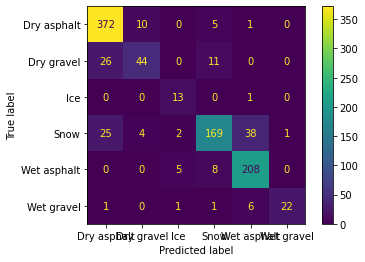

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)


In [40]:
trues=0
for true,pred in zip(y_test,y_pred_knn):
    if(true==pred):
        trues=trues+1
print(trues/len(y_test))

0.8501026694045175


Let's do some scaling

In [41]:
scaled_df=roadtype_features_df.copy()
scaler = preprocessing.StandardScaler()
scaled_df[features]=scaler.fit_transform(scaled_df[features])
scaled_df.head()

,Label,RMS,RMS_filt,Zero_Cross,Zero_Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt,kurt_filt
0,Wet gravel,-1.099067,-1.051164,-1.685799,-1.695884,-1.070411,-1.041093,-0.042279,0.180888,-1.099067,-1.051164,-0.213218
1,Wet gravel,-1.099699,-1.051745,-1.433701,-1.332827,-0.664377,-0.541997,0.911320,1.213620,-1.099698,-1.051745,-0.189527
2,Wet gravel,-1.094976,-1.047269,-0.687324,-0.251142,0.764052,1.012616,2.606215,2.639107,-1.094976,-1.047269,-0.169484
3,Wet gravel,-1.088020,-1.041688,-0.656530,-0.405669,0.408319,0.700608,2.524071,2.651901,-1.088020,-1.041688,0.003522
4,Wet gravel,-1.066113,-1.021826,0.048614,0.472298,1.394364,1.647357,3.310219,3.286398,-1.066113,-1.021826,-0.072355


KNN_with_scaling confusion matrix


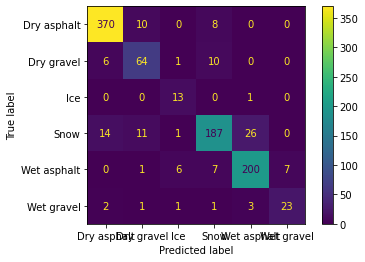

In [42]:
y=scaled_df["Label"]
X=scaled_df[features]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=y)
knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(x_train, y_train)
y_pred_knn = knn_with_scaling.predict(x_test)
print("KNN_with_scaling confusion matrix")
plot_confusion_matrix(knn_with_scaling, x_test, y_test)

In [43]:
trues=0
for true,pred in zip(y_test,y_pred_knn):
    if(true==pred):
        trues=trues+1
print(trues/len(y_test))

0.8798767967145791


In [44]:
filename="df-"+str(decimation_factor)+"_wl-3s_"+"26.2.2022.csv"
roadtype_features_df.to_csv(filename,index=False)